In [ ]:
!gdown 19do7KecsPyGr0DXa4O2-c_rMTS26kl7e

Downloading...
From: https://drive.google.com/uc?id=19do7KecsPyGr0DXa4O2-c_rMTS26kl7e
To: /content/canis.csv
100% 207k/207k [00:00<00:00, 98.6MB/s]


In [ ]:
!gdown 14XaWqdKcDXZF7CkprvebjScDX346xuK_

Downloading...
From: https://drive.google.com/uc?id=14XaWqdKcDXZF7CkprvebjScDX346xuK_
To: /content/fb-twitter.csv
100% 122k/122k [00:00<00:00, 115MB/s]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_csv("canis.csv")

In [ ]:
df.columns

Index(['Name (English)', 'Name (Chinese)', 'Region of Focus', 'Language',
       'Entity owner (English)', 'Entity owner (Chinese)',
       'Parent entity (English)', 'Parent entity (Chinese)',
       'X (Twitter) handle', 'X (Twitter) URL', 'X (Twitter) Follower #',
       'Facebook page', 'Facebook URL', 'Facebook Follower #',
       'Instragram page', 'Instagram URL', 'Instagram Follower #',
       'Threads account', 'Threads URL', 'Threads Follower #',
       'YouTube account', 'YouTube URL', 'YouTube Subscriber #',
       'TikTok account', 'TikTok URL', 'TikTok Subscriber #'],
      dtype='object')

In [ ]:
social_media_columns = ['X (Twitter) handle', 'Facebook page', 'Instragram page', 'Threads account', 'YouTube account', 'TikTok account']

In [ ]:
user_count = {}

In [ ]:
for media in social_media_columns:
  user_count[f'{media}'] = df[df[f'{media}'].notnull()].shape[0]

In [ ]:
user_count

{'X (Twitter) handle': 573,
 'Facebook page': 326,
 'Instragram page': 139,
 'Threads account': 35,
 'YouTube account': 159,
 'TikTok account': 121}

In [ ]:
keys = list(user_count.keys())
vals = [user_count[k] for k in keys]

Text(0.5, 1.0, 'Platforms ranked by number of accounts')

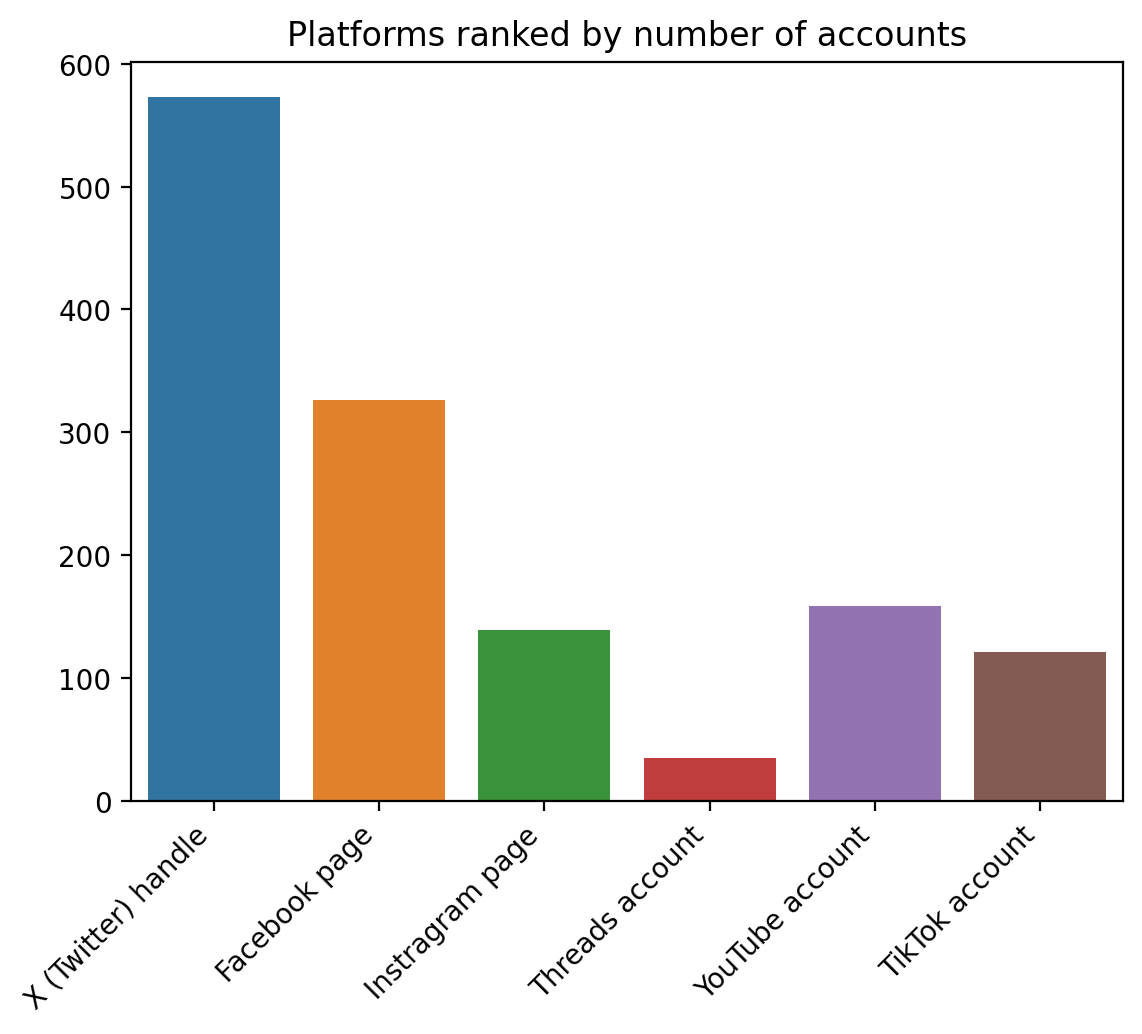

In [ ]:
chart = sns.barplot(x=keys, y=vals)
chart.set_xticklabels(chart.get_xticklabels() ,rotation=45, horizontalalignment='right')
chart.set_title("Platforms ranked by number of accounts")

In [ ]:
df['Entity owner (English)'].value_counts()

Ministry of Foreign Affairs                     286
China Media Group (CMG)                         238
China Daily Press                                37
Xinhua News Agency                               34
People's Daily Press                             34
                                               ... 
Chengdu Municipal People's Government             1
Jiaxing Radio and Television Media Co., Ltd.      1
Ministry of Commerce Information Office           1
Qiushi Magazine Press                             1
Wenshan Radio & Television Station                1
Name: Entity owner (English), Length: 87, dtype: int64

In [ ]:
df = df.fillna(0)

In [ ]:
follower_count_columns = ['Facebook Follower #', 'Instagram Follower #', 'Threads Follower #', 'TikTok Subscriber #', 'X (Twitter) Follower #', 'YouTube Subscriber #']

In [ ]:
for column in follower_count_columns:
  df[f'{column}'] = df[f'{column}'].apply(lambda e: e if (type(e) == int or type(e) == float) else int(e.replace(",", '')))

In [ ]:
df['Total Followers'] = 0
for column in follower_count_columns:
  df['Total Followers'] += df[f'{column}']

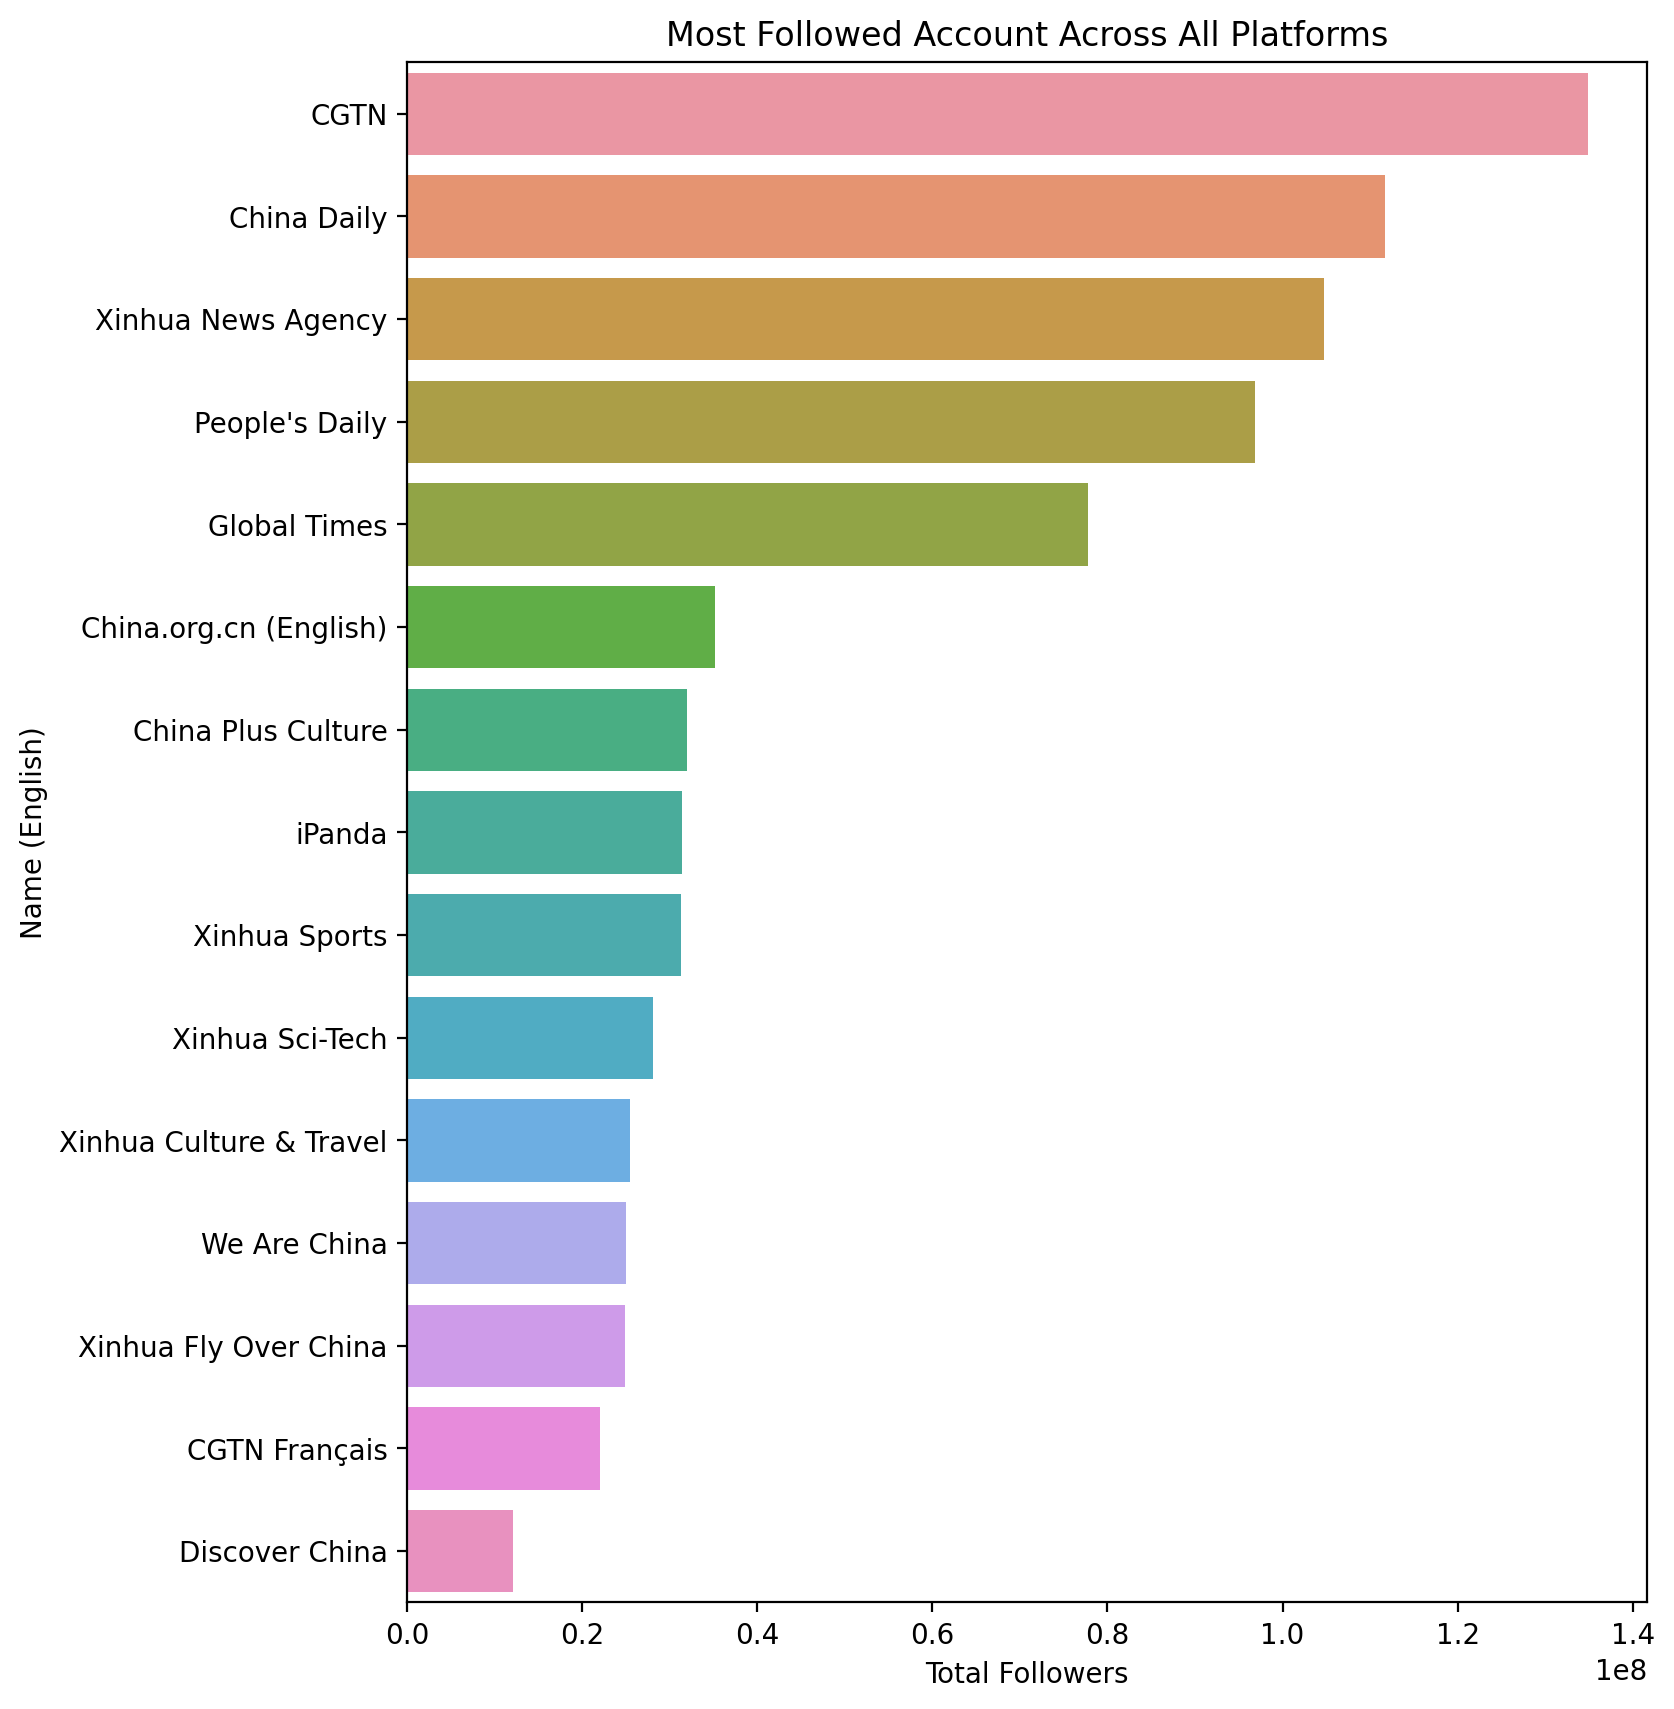

In [ ]:
data_totalf = df.sort_values(by='Total Followers',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Name (English)", x="Total Followers" , data=data_totalf)
graph.set(xlabel="Total Followers", title="Most Followed Account Across All Platforms")
plt.show()

In [ ]:
excludes = ['Name (English)', 'Entity owner (Chinese)', 'Parent entity (Chinese)', 'Name (Chinese)', 'X (Twitter) handle', 'X (Twitter) URL', 'Facebook page', 'Facebook URL', 'Instragram page', 'Instagram URL', 'Threads account', 'Threads URL', 'YouTube account', 'YouTube URL', 'TikTok account', 'TikTok URL']

In [ ]:
corr = data_totalf.loc[:, ~data_totalf.columns.isin(excludes)].apply(lambda x: x.factorize()[0]).corr()

In [ ]:
for column in corr.columns:
  corr[column] = corr[column].astype(float)

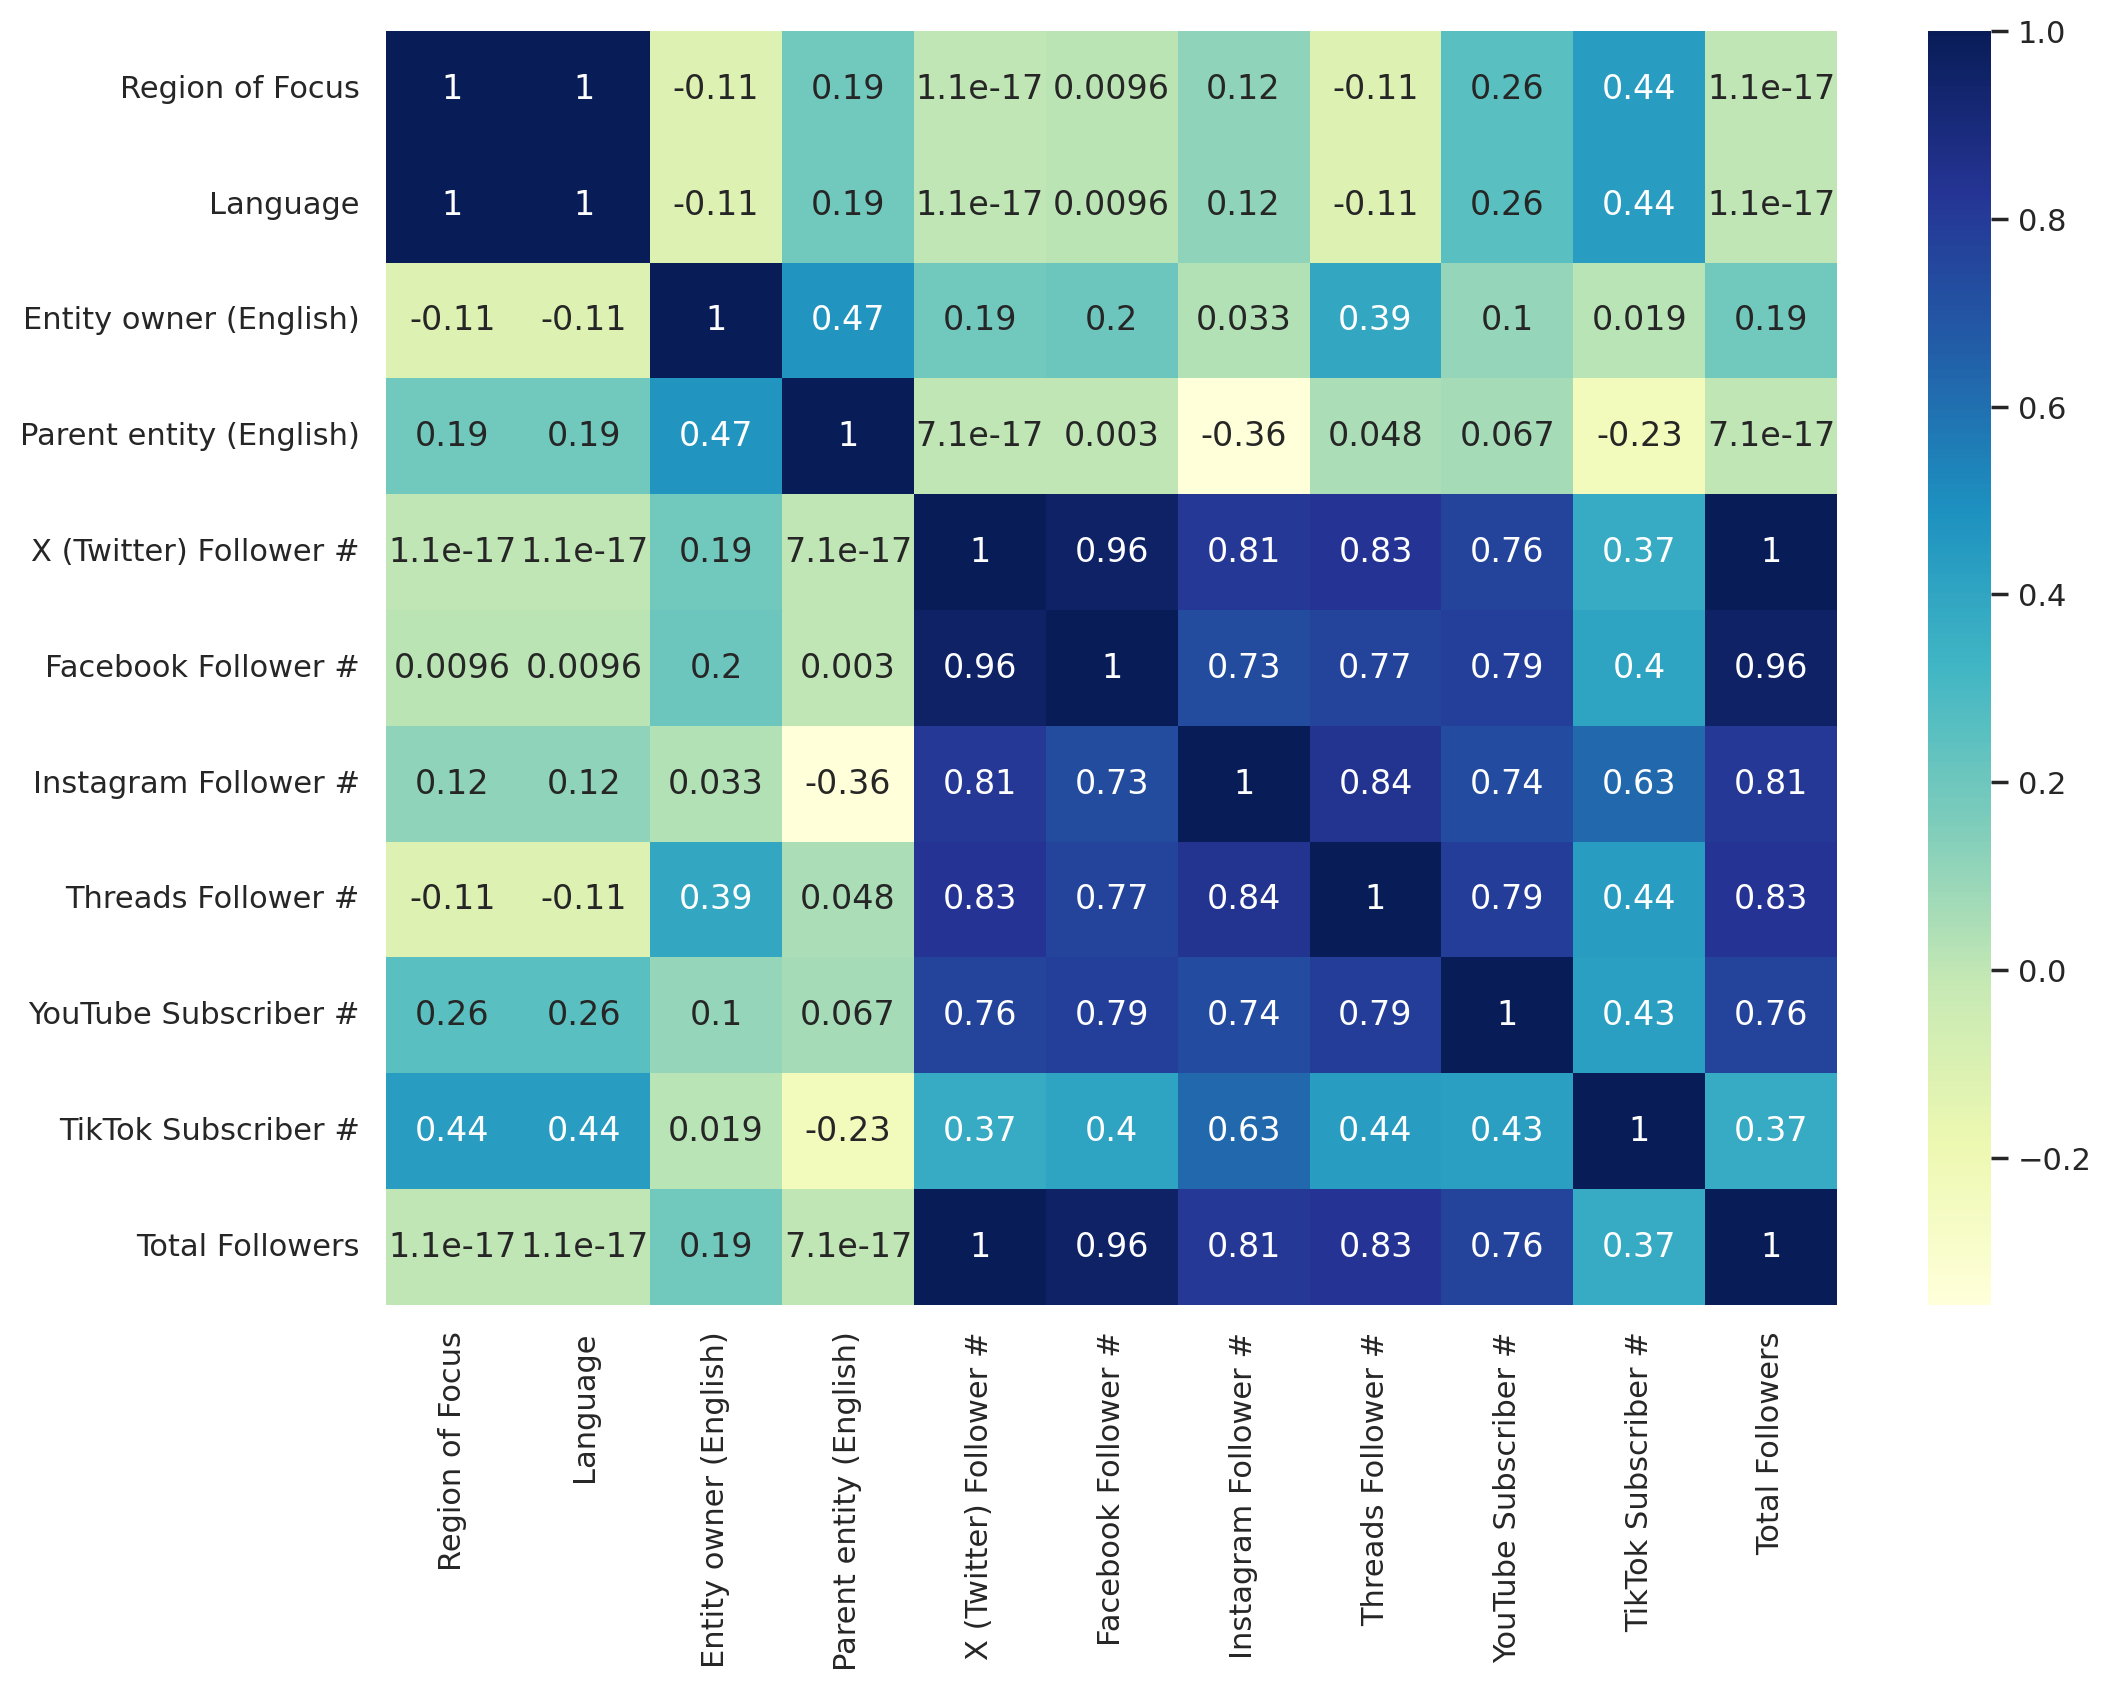

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

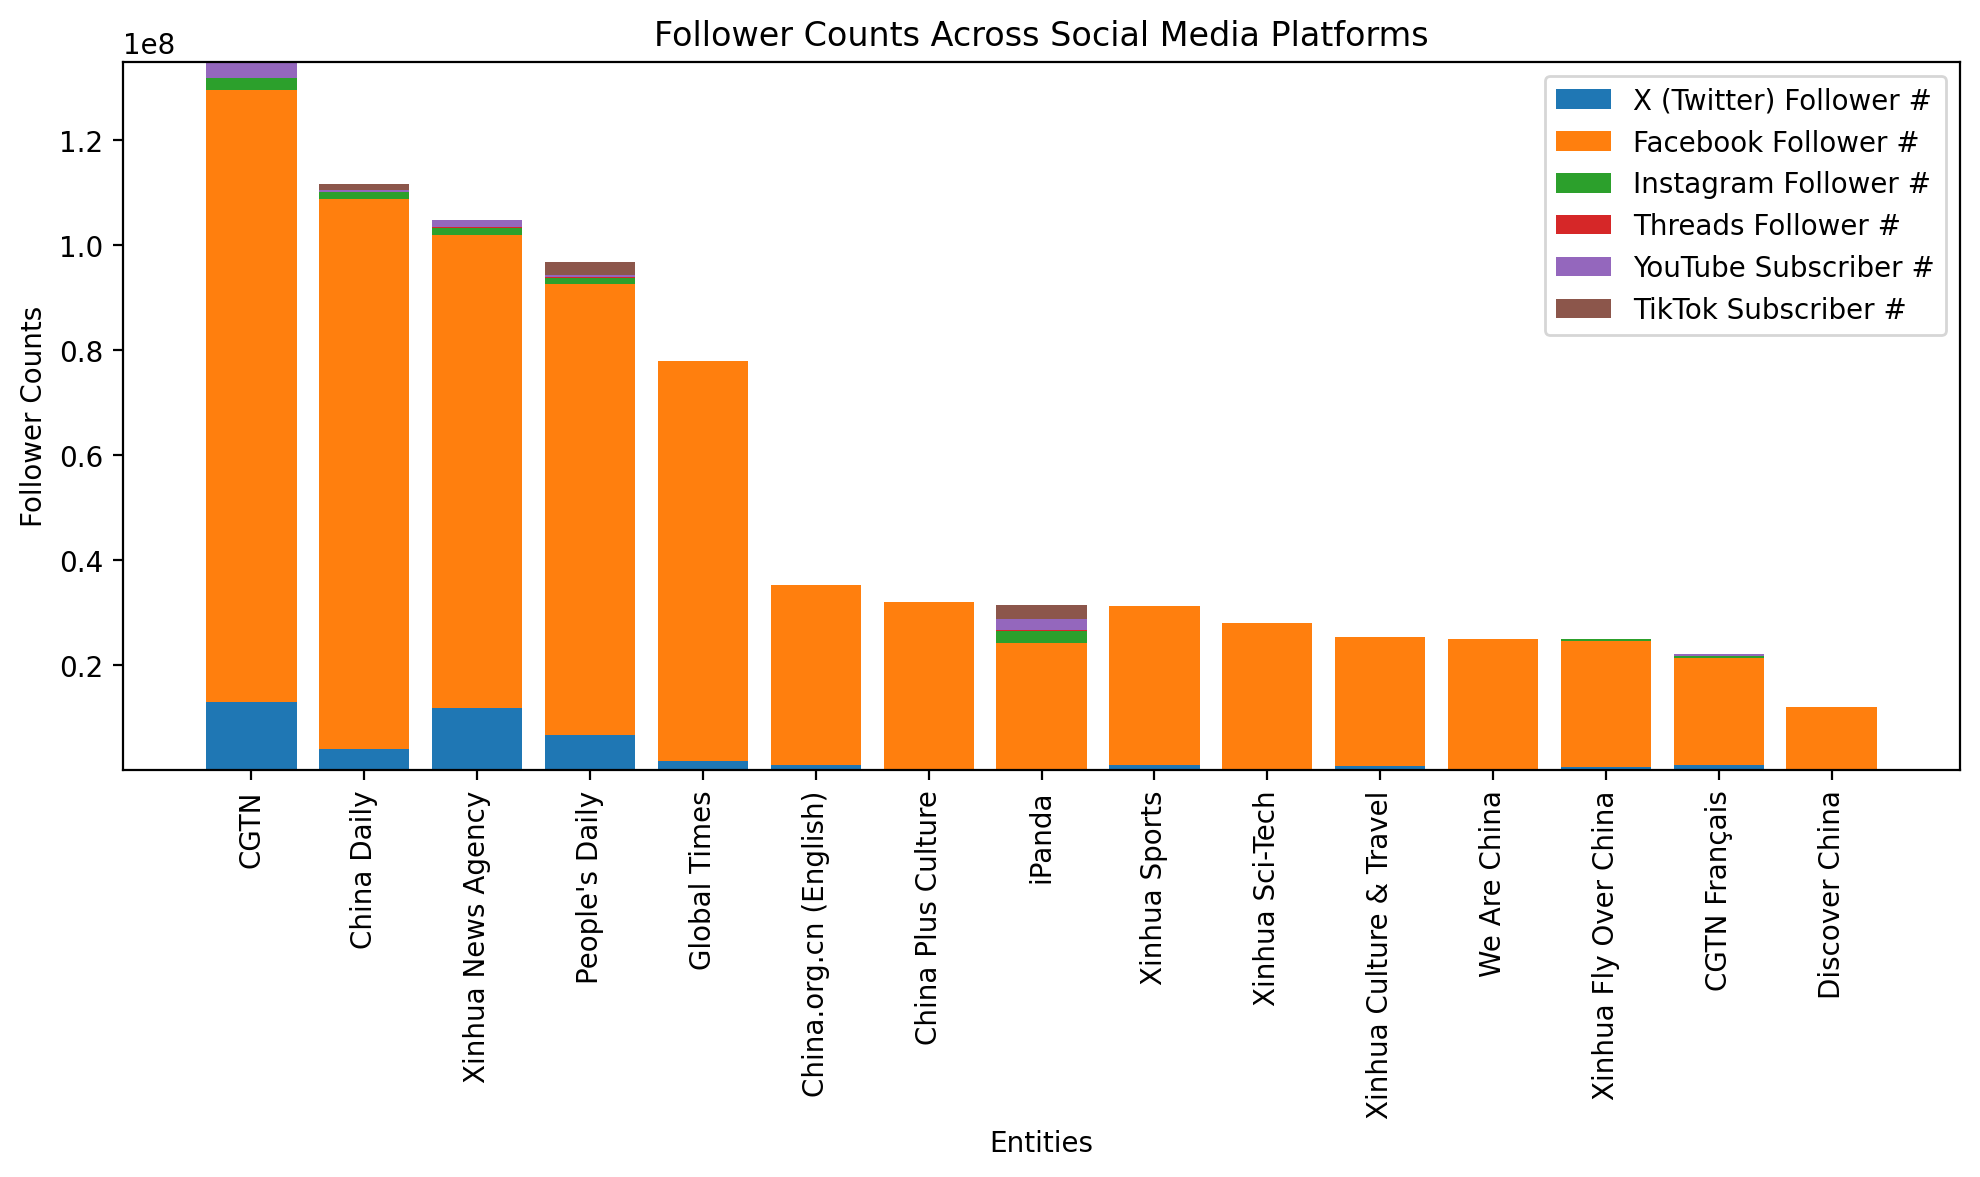

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Total Followers' column contains the sum of follower counts across platforms
# Selecting relevant columns for visualization
data_for_chart = data_totalf[['Name (English)', 'X (Twitter) Follower #', 'Facebook Follower #', 'Instagram Follower #', 'Threads Follower #', 'YouTube Subscriber #', 'TikTok Subscriber #']]

# Create a stacked bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Extracting columns for plotting
platforms = data_for_chart.columns[1:]
followers_counts = data_for_chart.iloc[:, 1:].values.T  # Transposing for stacking

# Plotting stacked bars
bottom = 0
for i, platform in enumerate(platforms):
    plt.bar(data_for_chart['Name (English)'], followers_counts[i], label=platform, bottom=bottom)
    bottom += followers_counts[i]

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Entities')
plt.ylabel('Follower Counts')
plt.title('Follower Counts Across Social Media Platforms')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
posts = pd.read_csv('fb-twitter.csv')

In [ ]:
posts.columns

Index(['Page', 'Posts', 'sentiment'], dtype='object')

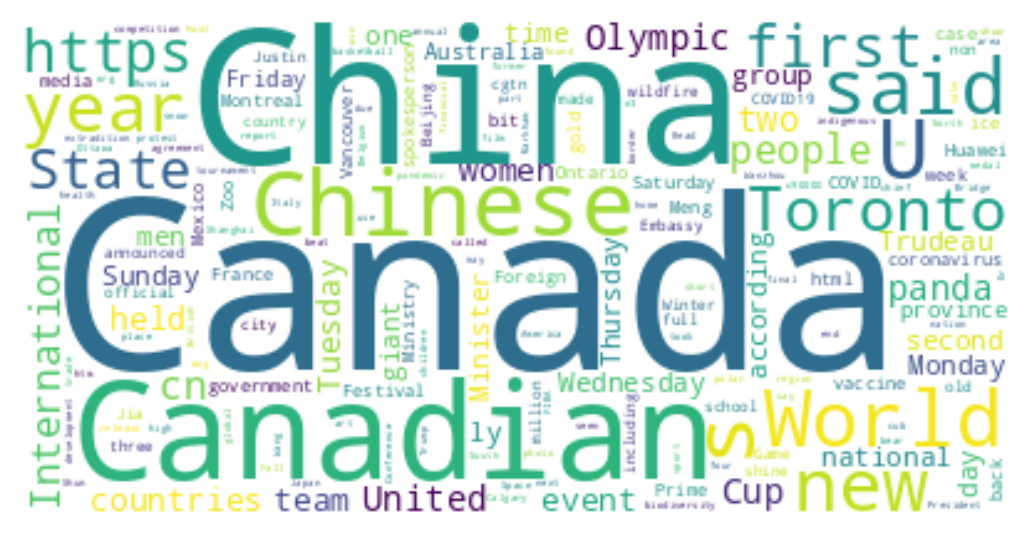

In [ ]:
stop_words = stopwords.words('english')
stop_words = stop_words + ['https']
posts['Posts'] = posts['Posts'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
text = " ".join(post for post in posts.Posts)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from collections import Counter
from nltk.util import ngrams
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [ ]:
df_total = documentNgrams(posts["Posts"], 2)

In [ ]:
df_total

,words,count
521,Trudeau said,7
910,"Ontario, Canada,",7
2217,"Toronto, Canada,",8
252,Justin Trudeau,9
2413,Toronto Zoo,9
2404,Jia Panpan,9
207,Meng Wanzhou,10
4451,Read full:,11
407,Foreign Ministry,11
1085,"United States,",13


<Axes: title={'center': 'Most Used Bigrams'}, xlabel='bigrams', ylabel='Occurance'>

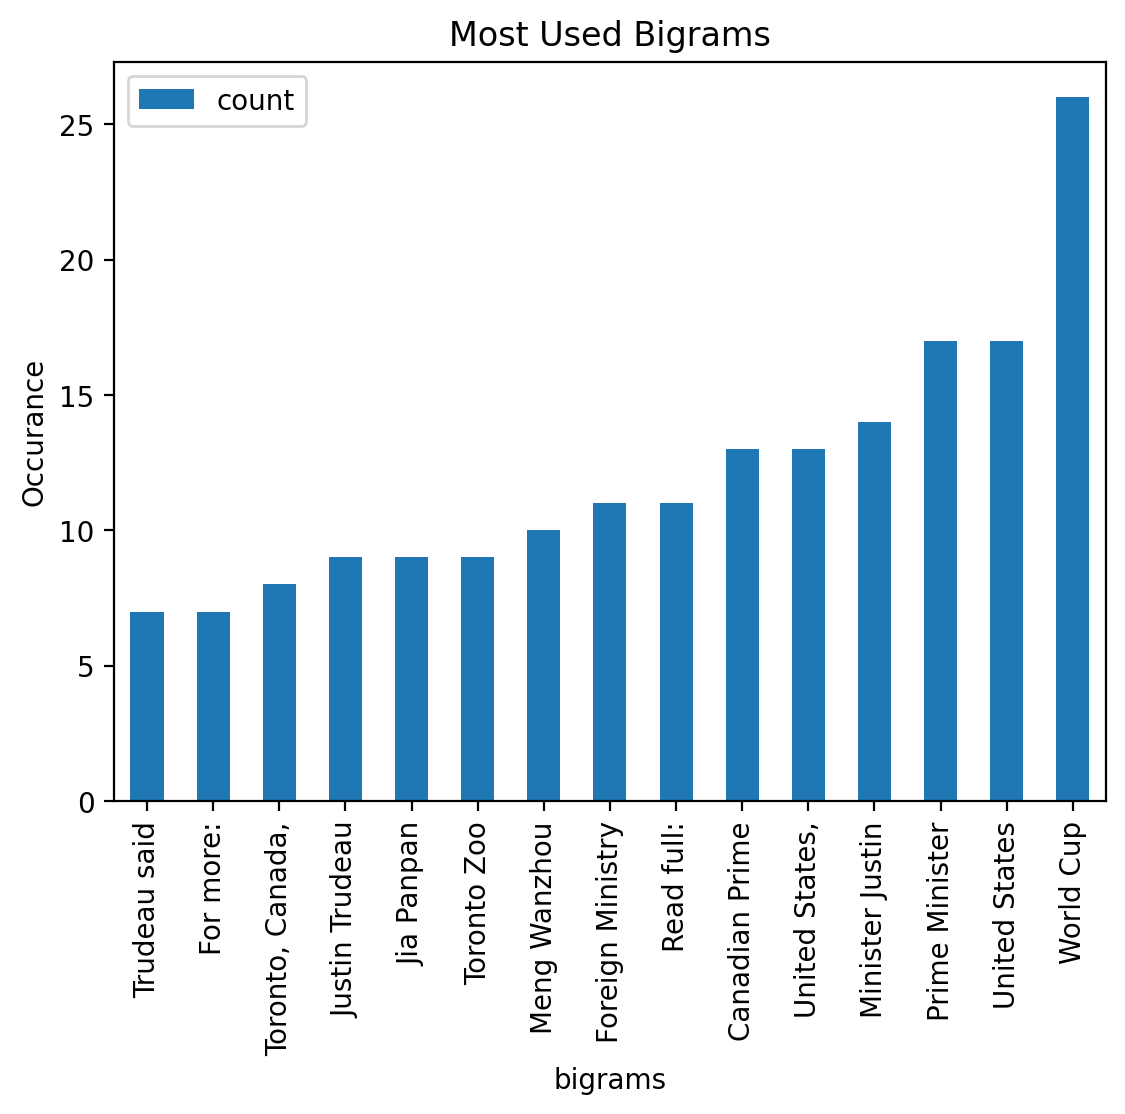

In [ ]:
df_total.plot(x='words', y='count', kind='bar', title='Most Used Bigrams', xlabel='bigrams', ylabel='Occurance')

In [ ]:
posts

,Page,Posts
0,CGTN,The U.S. confirmed first case #monkeypox state...
1,CGTN,Protestors COVID-19 vaccines mandates gathered...
2,CGTN,The death toll massive floods landslides devas...
3,CGTN,"The center downtown Ottawa surrounded fencing,..."
4,CGTN,"A statue Queen Victoria Winnipeg, Manitoba, to..."
...,...,...
437,Sanghai Daily,Wednesday pledged press ahead negotiations fre...
438,Sanghai Daily,"United States ""extremely intense"" talks reach ..."
439,Sanghai Daily,"lodged solemn representations United States, d..."
440,Sanghai Daily,US President Donald Trump’s tariffs steel alum...


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy
import numpy as np
from scipy.special import softmax
import tensorflow as tf

# MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# config = AutoConfig.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)


#distilbert

model_name_d="distilbert-base-uncased-finetuned-sst-2-english"

tokenizer = AutoTokenizer.from_pretrained(model_name_d)

config = AutoConfig.from_pretrained(model_name_d)

model = AutoModelForSequenceClassification.from_pretrained(model_name_d)

# from transformers import BertTokenizer, BertForSequenceClassification,BertConfig

# model_name_b='bert-base-uncased'

# tokenizer = BertTokenizer.from_pretrained(model_name_b)

# config = BertConfig.from_pretrained(model_name_b)

# model = BertForSequenceClassification.from_pretrained(model_name_b)

def sentiment_labels(text):
    encoded_input = tokenizer(text, padding=True,truncation=True,max_length=512, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    return config.id2label[ranking[0]]

In [ ]:
i = 10
print(sentiment_labels(posts['Posts'][i]), posts['Posts'][i])

NEGATIVE Leaders Canada, UK U.S. believe Ukrainian plane shot Iranian missile. It may accidental. https://newsaf.cgtn.com/.../US-officials.../index.html


In [ ]:
preds = []
for post in posts['Posts']:
  preds.append(sentiment_labels(post))

In [ ]:
posts['sentiment'] = preds

In [ ]:
posts.to_csv('sentiment.csv', index=False)

In [ ]:
sent = pd.read_csv('sentiment.csv')

In [ ]:
sent.head()

,Page,Posts,sentiment
0,CGTN,The U.S. confirmed first case #monkeypox state...,NEGATIVE
1,CGTN,Protestors COVID-19 vaccines mandates gathered...,NEGATIVE
2,CGTN,The death toll massive floods landslides devas...,NEGATIVE
3,CGTN,"The center downtown Ottawa surrounded fencing,...",NEGATIVE
4,CGTN,"A statue Queen Victoria Winnipeg, Manitoba, to...",NEGATIVE


<Axes: title={'center': 'Total Positive and Negative News'}, xlabel='sentiment', ylabel='Number of news'>

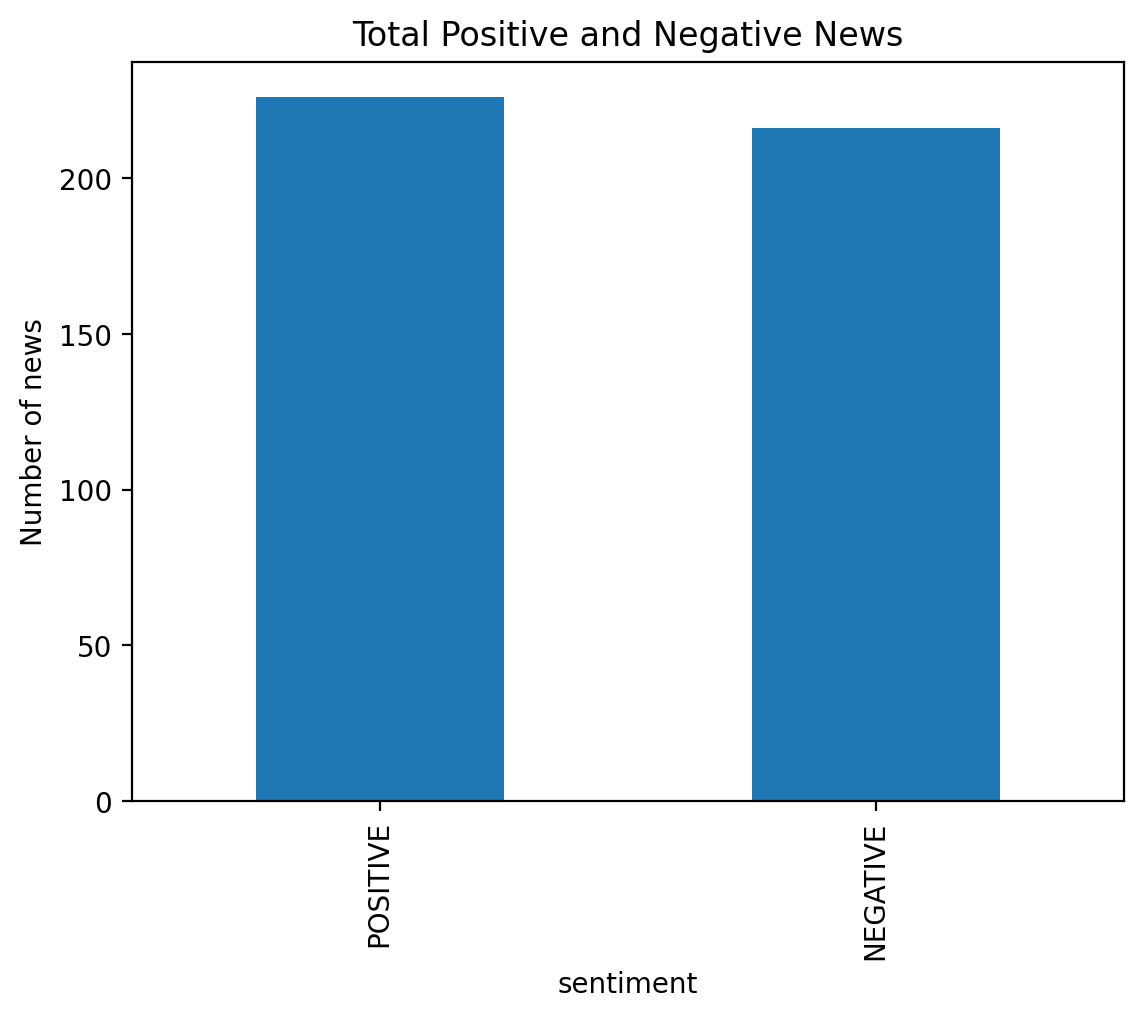

In [ ]:
sent.sentiment.value_counts().plot(kind='bar', title='Total Positive and Negative News', xlabel='sentiment', ylabel='Number of news')

In [ ]:
pages = sent['Page'].unique()

In [ ]:
data = {}
for page in pages:
  data[page] = {}
  data[page]['Positive'] = sent[(sent['sentiment'] == 'POSITIVE') & (sent['Page'] == page)].shape[0]
  data[page]['Negative'] = sent[(sent['sentiment'] == 'NEGATIVE') & (sent['Page'] == page)].shape[0]

In [ ]:
data

{'CGTN': {'Positive': 18, 'Negative': 42},
 'China Daily': {'Positive': 13, 'Negative': 33},
 'China.org.cn': {'Positive': 10, 'Negative': 9},
 'China Plus Culture': {'Positive': 19, 'Negative': 23},
 'China Xinhua Sports': {'Positive': 42, 'Negative': 4},
 'China Xinhua Sci-Tech': {'Positive': 5, 'Negative': 3},
 'WE ARE CHINA': {'Positive': 6, 'Negative': 13},
 'Xinhua Culture&Travel': {'Positive': 9, 'Negative': 1},
 'iPanda ': {'Positive': 13, 'Negative': 1},
 'Discover China': {'Positive': 9, 'Negative': 1},
 'China Science ': {'Positive': 5, 'Negative': 9},
 'Beautiful China': {'Positive': 6, 'Negative': 1},
 'Sports China': {'Positive': 31, 'Negative': 12},
 "People's Daily, China ": {'Positive': 29, 'Negative': 18},
 'Modern China': {'Positive': 1, 'Negative': 7},
 'Sanghai Daily': {'Positive': 10, 'Negative': 39}}

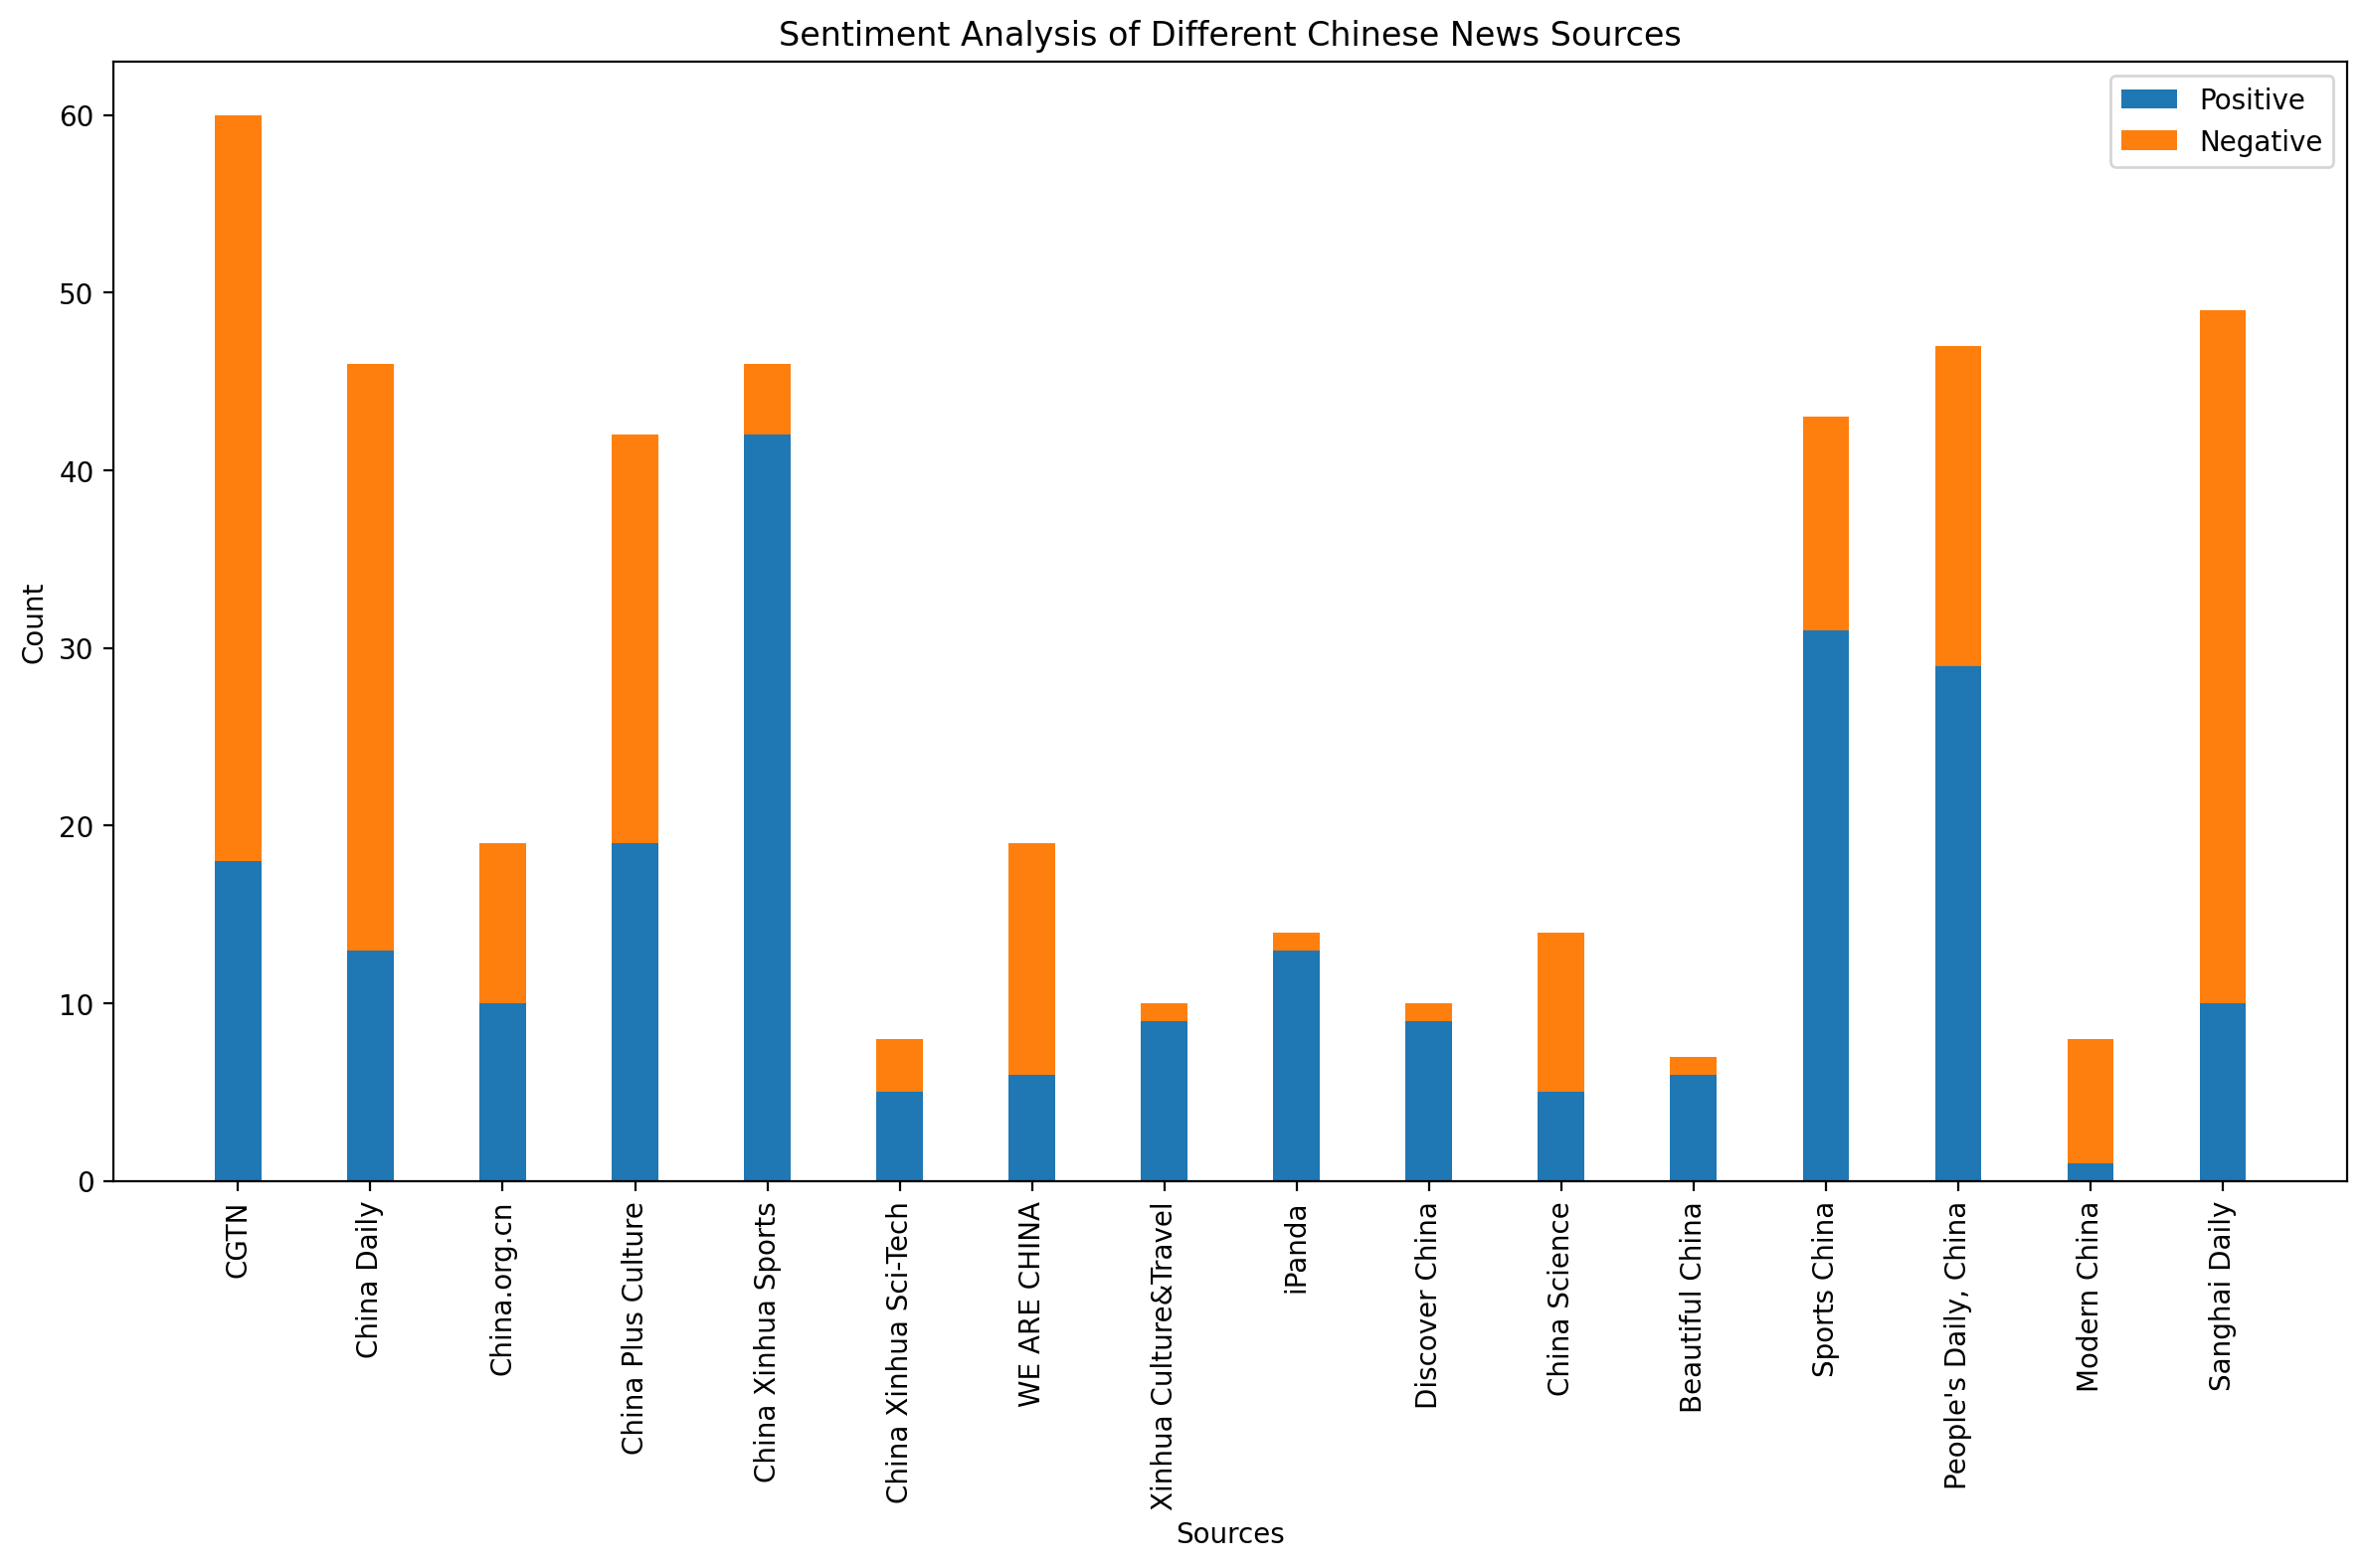

In [ ]:
# Extracting data for plotting
sources = list(data.keys())
positive_values = [data[source]['Positive'] for source in sources]
negative_values = [data[source]['Negative'] for source in sources]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = range(len(sources))

bar1 = plt.bar(index, positive_values, bar_width, label='Positive')
bar2 = plt.bar(index, negative_values, bar_width, label='Negative', bottom=positive_values)

plt.xlabel('Sources')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Different Chinese News Sources')
plt.xticks(index, sources, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()